# Identify cosmic ray hits in 2-D spectra
Manually go through all the images of 2-D spectra to find and identify cosmic ray hits

In [151]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from glob import glob
from PIL import Image

from IPython.display import Image, display

In [152]:
results_folder = '/home/zoek/code/APF-BL-DAP/Zoe/Results'

results_table_file = '/home/zoek/code/APF-BL-DAP/Zoe/Results/final_results.csv'
results_table = pd.read_csv(results_table_file)
results_table['CRT'] = False

   Unnamed: 0       star  s shifted wl  s unshifted wl  s heights  \
3           0  HIP104092   5400.050525     5400.854902   4.533516   

   r shifted wl  r unshifted wl  r heights    CRT  
3   5400.050525     5400.854902   4.461104  False  
Star: HIP104092, Unshifted WL: 5400.85


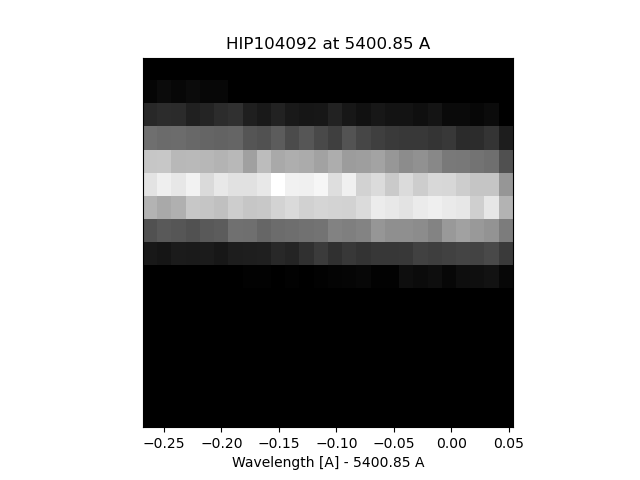

New star/wl: Cosmic ray hit?  n


Star: HIP104092, Unshifted WL: 5400.85


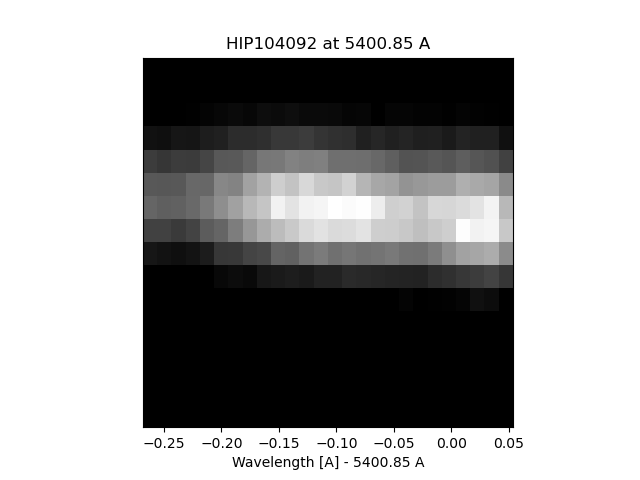

Cosmic ray hit?  n


Star: HIP104092, Unshifted WL: 5400.85


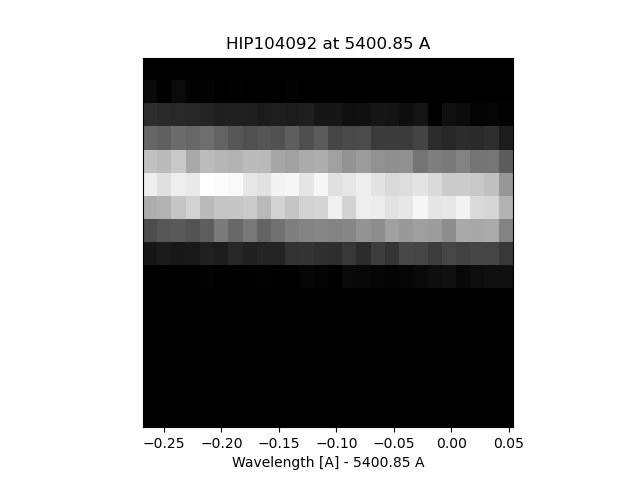

Cosmic ray hit?  n


Star: HIP104092, Unshifted WL: 5400.85


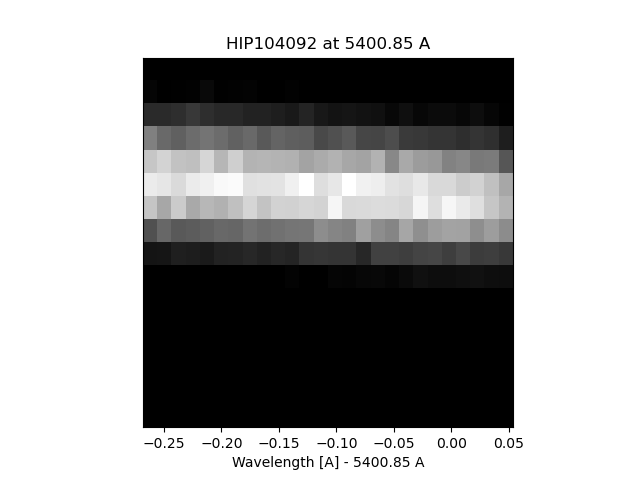

Cosmic ray hit?  n


     Unnamed: 0      star  s shifted wl  s unshifted wl  s heights  \
117           1  HIP80725   5725.842377     5727.257566   1.876492   

     r shifted wl  r unshifted wl  r heights    CRT  
117   5725.842377     5727.257566   1.877488  False  
Star: HIP80725, Unshifted WL: 5727.26


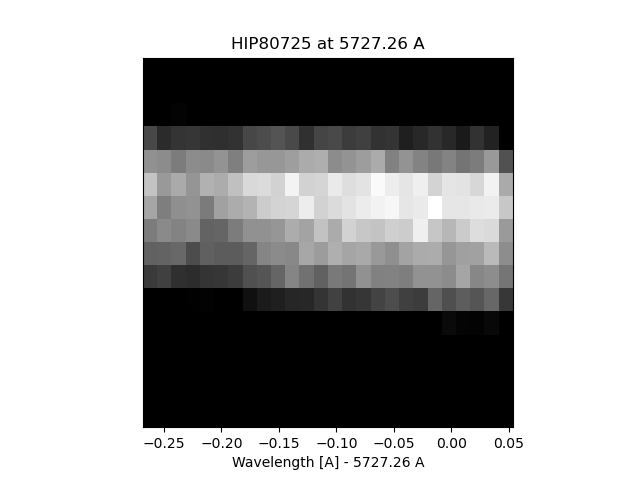

New star/wl: Cosmic ray hit?  n


Star: HIP80725, Unshifted WL: 5727.26


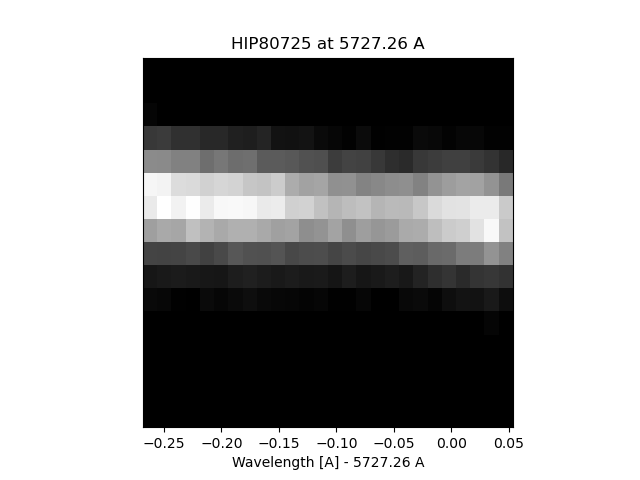

Cosmic ray hit?  n


Star: HIP80725, Unshifted WL: 5727.26


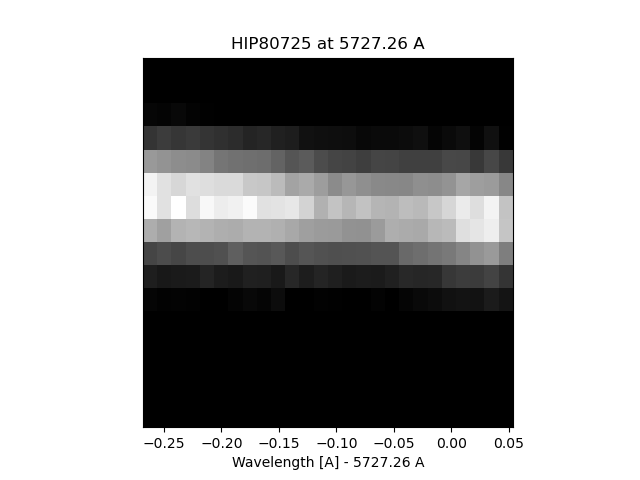

Cosmic ray hit?  n


Star: HIP80725, Unshifted WL: 5727.26


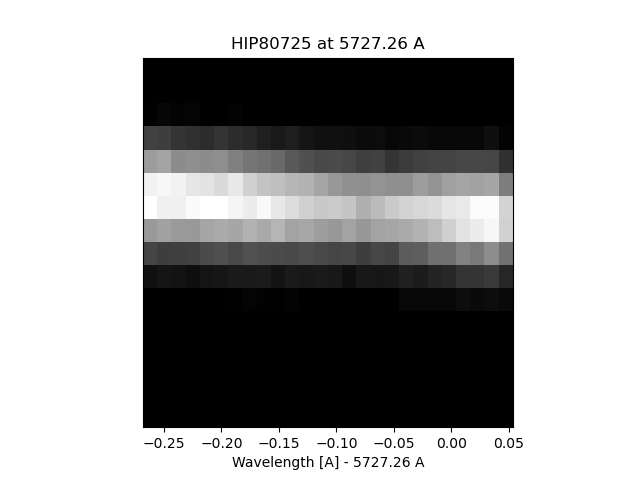

Cosmic ray hit?  n


     Unnamed: 0      star  s shifted wl  s unshifted wl  s heights  \
116           2  HIP80725   5796.799683     5798.232409   1.134942   

     r shifted wl  r unshifted wl  r heights    CRT  
116   5796.799683     5798.232409   1.090343  False  
Star: HIP80725, Unshifted WL: 5798.23


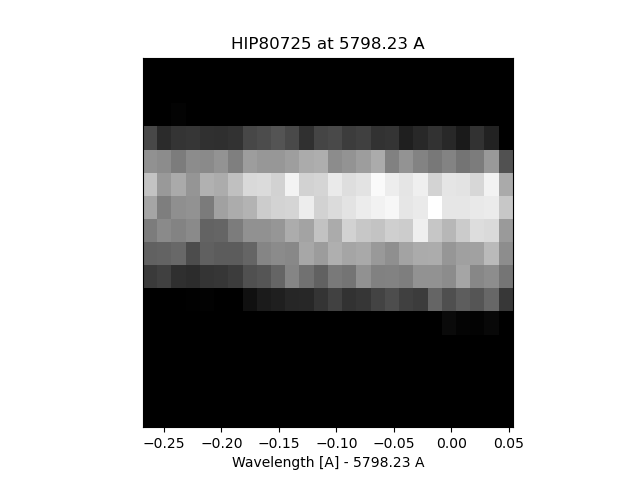

New star/wl: Cosmic ray hit?  n


Star: HIP80725, Unshifted WL: 5798.23


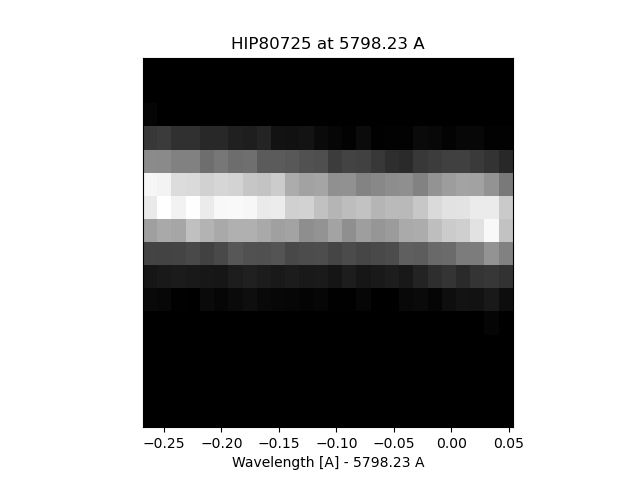

Cosmic ray hit?  n


Star: HIP80725, Unshifted WL: 5798.23


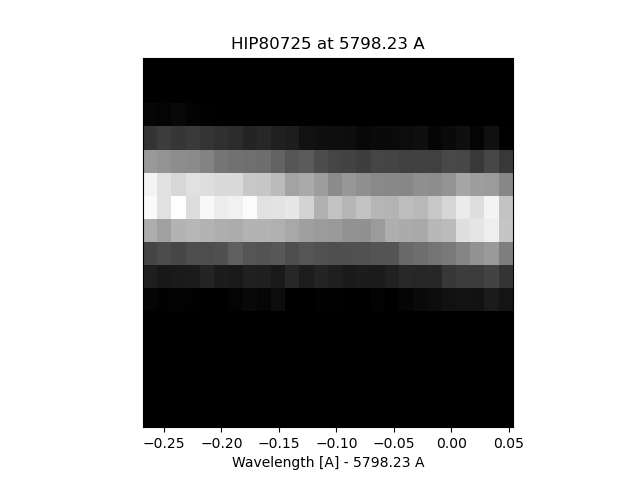

Cosmic ray hit?  n


Star: HIP80725, Unshifted WL: 5798.23


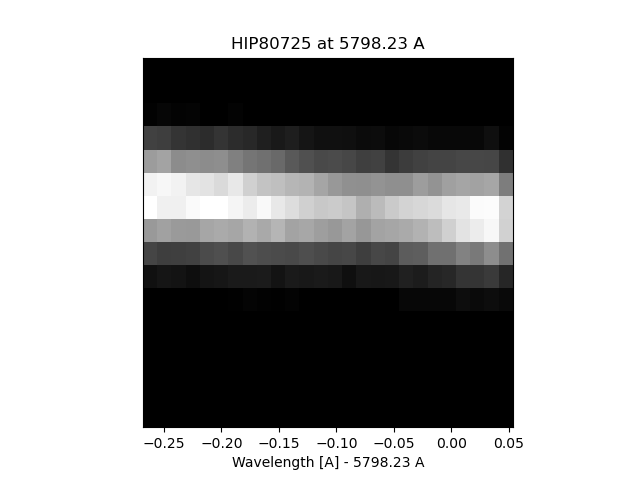

Cosmic ray hit?  n


    Unnamed: 0      star  s shifted wl  s unshifted wl  s heights  \
40           3  HIP20219   5801.995817     5803.341409   1.285886   

    r shifted wl  r unshifted wl  r heights    CRT  
40           NaN             NaN        NaN  False  
Star: HIP20219, Unshifted WL: 5803.34


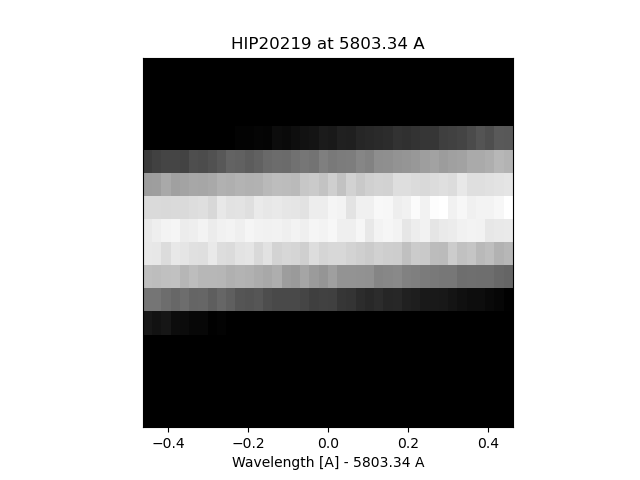

New star/wl: Cosmic ray hit?  n


    Unnamed: 0       star  s shifted wl  s unshifted wl  s heights  \
18           4  HIP115738    5517.83986     5517.877214   0.954979   

    r shifted wl  r unshifted wl  r heights    CRT  
18           NaN             NaN        NaN  False  
Star: HIP115738, Unshifted WL: 5517.88


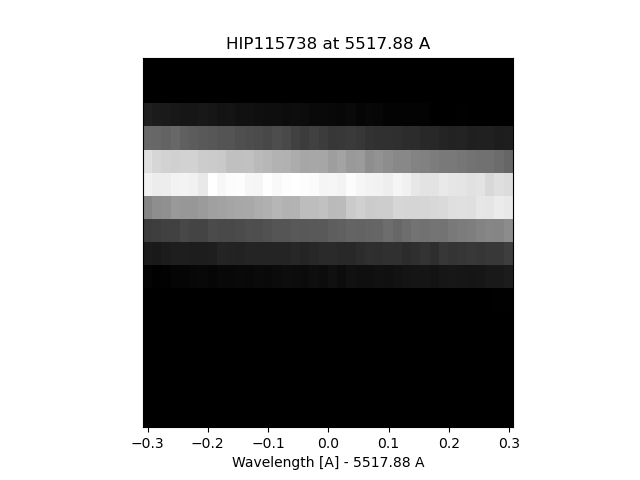

KeyboardInterrupt: Interrupted by user

In [150]:
# iterate through every folder in results folder - this corresponds to a unique star
for folder in glob(results_folder + '/*/'):
    star = folder.split('/')[-2]
    
    # iterate through every folder in the star's folder - this correpsonds to an individual detection
    for subfolder in glob(folder + '/*/'):
        # find the row of this detection in the results table
        wavelength = subfolder.split('/')[-2]
        star_table = results_table[results_table['star'] == star]
        detection_row = star_table[np.round(star_table['s unshifted wl'], 2) == np.round(float(wavelength), 2)]
        ind = detection_row.index # this is the index correpsonding to the entry of this detection in the results table
        
        # run through plots and update table
        i = 0
        for file in glob(subfolder + '/*'):
            print('Star: ' + str(star) + ', Unshifted WL: ' + str(wavelength))
            display(Image(filename=file))
            if i == 0:
                text = 'New star/wl: '
            else:
                text = ""
            CRT = input(text + "Cosmic ray hit? ")
            if CRT == 'y':
                print('cosmic ray hit!')
                results_table.at[ind,'CRT'] = True
            i += 1

In [141]:
# for all the stars and wavelengths that were missed

missed_stars = ['']
missed_wls = []

for i in np.arange(len(missed_stars)):
    star = missed_stars[i]
    wl = missed_wls[i]

    star_table = results_table[results_table['star'] == star]
    detection_row = star_table[np.round(star_table['s unshifted wl'], 2) == wl]
    
    ind = detection_row.index # this is the index correpsonding to the entry of this detection in the results table
    results_table.at[ind,'CRT'] = True